In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = np.arange(0.001, 4, 0.001) # m3/min

d = 0.114
l = 5
rho = 1000

a = np.pi * d**2 / 4
q_si = q / 60
v = q_si / a

def Re(v):
    d = 0.114 
    rho = 1000
    mu = 0.001
    return rho * v * d / mu


In [10]:
def res(Re):
    # Создаем массив для результатов того же размера, что и Re
    result = np.zeros_like(Re)
    
    # Применяем разные формулы в зависимости от условия
    mask = (Re < 2300)
    result[mask] = 64.0 / Re[mask]
    result[~mask] = 0.316 * np.power(Re[~mask], -0.25)
    
    return result

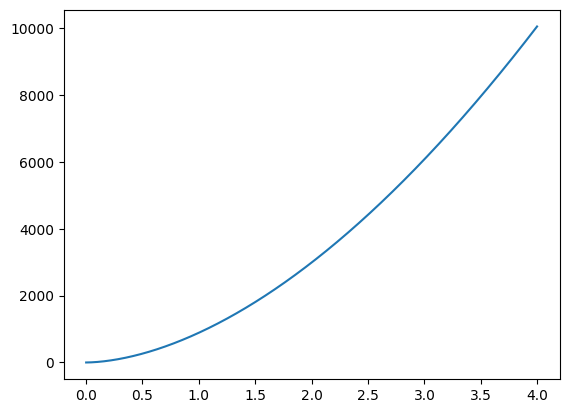

In [11]:
plt.plot(q, res(Re(v)) * l / d * np.power(v, 2) / 2 * rho)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

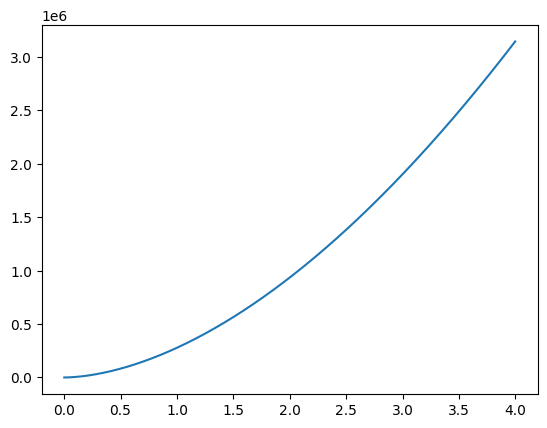

In [12]:
plt.plot(q, res(Re(v)) * 1000 / 0.073 * np.power(v, 2) / 2 * rho)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

https://sci-hub.ru/https://doi.org/10.1016/j.euromechflu.2019.07.007

In [13]:
# def f_t(Re, eps):
#     return 6.4 * np.power(
#         np.log(
#             1 / Re + 0.01 * eps * (1 + 10 * np.sqrt(eps) / (1 + 225 * eps**2) + 5000 * eps**3)
#             ),
#         -2.4)

def f_t(Re, eps):
    return 6.4 * np.power(
        np.log(Re) - np.log(1 + 0.01 * Re * eps * (1 + 10 * np.sqrt(eps))),
        -2.4)

f_t(Re(v), 0.05)

array([0.13688024, 0.10943971, 0.09896574, ..., 0.07364933, 0.07364932,
       0.07364931])

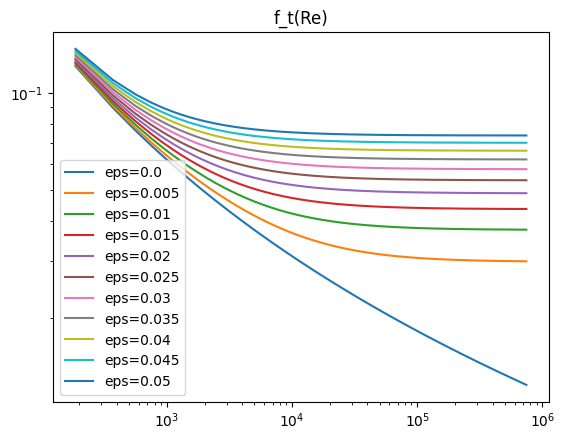

In [14]:
for eps in np.arange(0.0, 0.055, 0.005):
    plt.plot(Re(v), f_t(Re(v), eps), label=f'eps={eps}')
plt.title('f_t(Re)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

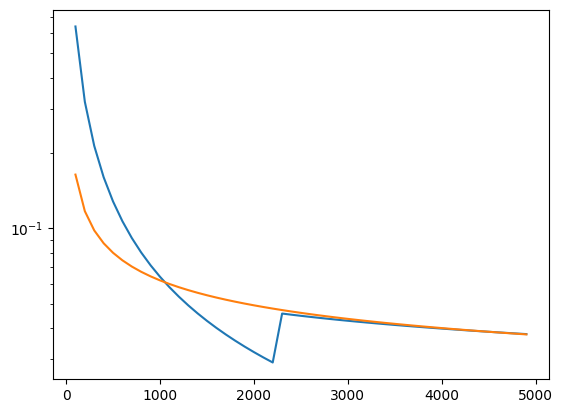

In [25]:
Re_c = np.arange(100.0, 5000.0, 100.0)
plt.plot(Re_c, res(Re_c))
plt.plot(Re_c, f_t(Re_c, 0.0))
plt.yscale('log')